# Transaction analysis for mainnet

In [1]:
import pandas as pd
import plotly.express as px 

In [2]:
def aggregate_sum(df, time, name):
    agg = df.groupby([pd.Grouper(freq= str(time) + 'Min', key = 'time'), name])[name].sum().\
    reset_index(name = 'agg_sum')
    return agg

In [3]:
df = pd.read_pickle("../pickle/2020_04_19_ostn.pkl")

## transactions total from 2020-04-19 00:00:01 - 2020-04-20 00:00:00

In [4]:
df['transactions'].sum()

132

## staking transactions total from 2020-04-19 00:00:01 - 2020-04-20 00:00:00

In [5]:
df['staking-transactions'].sum()

3446

## Visualizations

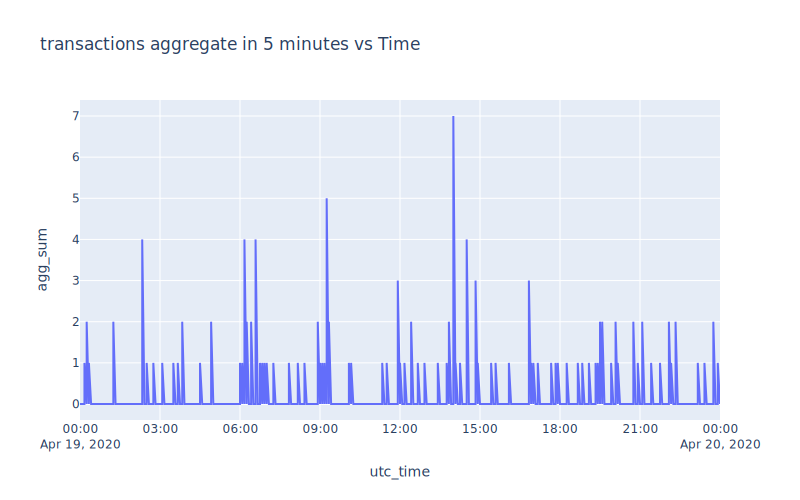

In [7]:
agg = aggregate_sum(df, 5, 'transactions')

fig = px.line(agg, x="time", y="agg_sum", 
          title =  'transactions aggregate in 5 minutes vs Time')
fig.update_layout(xaxis_title="utc_time", legend_orientation="h", legend=dict(x=0, y=-0.1))
fig.show(renderer="svg",width=800, height=500)

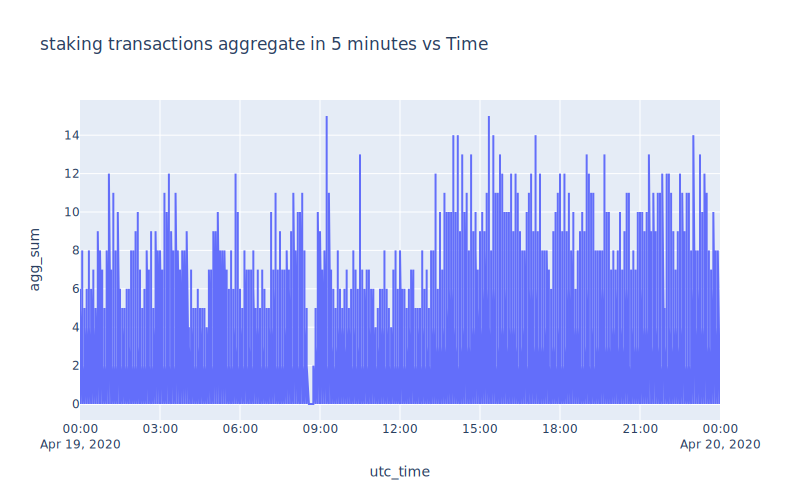

In [8]:
agg = aggregate_sum(df, 5, 'staking-transactions')

fig = px.line(agg, x="time", y="agg_sum", 
          title =  'staking transactions aggregate in 5 minutes vs Time')
fig.update_layout(xaxis_title="utc_time", legend_orientation="h", legend=dict(x=0, y=-0.1))
fig.show(renderer="svg",width=800, height=500)